### Importing libraries

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd 
from numpy import array
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import plot_model
from keras.utils import to_categorical
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from PIL import Image
from os import listdir
from keras.layers import Input
from pickle import dump, load

## Preparation of Images Data / extracting feature using  VGG model

Here the features are extracted from all the images in the dataset. InceptionV3 outputs a 2048 dimensional vector for each image, which we'll feed to RNN Model.

In [53]:
#Feature Extraction
def extract_features(directory):
    model = InceptionV3()
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    print(model.summary())
    features = dict()
    for name in listdir(directory):
        filename = directory + '/' + name
        image = load_img(filename, target_size=(299, 299))
        image = img_to_array(image)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        image = preprocess_input(image)
        feature = model.predict(image, verbose=0)
        image_id = name.split('.')[0]
        features[image_id] = feature
        print('>%s' % name)
    return features

In [54]:
directory = '/home/suman/Desktop/Image_captioning/Flicker_dataset/Flickr8k_Dataset/Flicker8k_Dataset'
features = extract_features(directory)
print('Features of the images: %d' % len(features))


Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_659 (Conv2D)             (None, 149, 149, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_659 (BatchN (None, 149, 149, 32) 96          conv2d_659[0][0]                 
__________________________________________________________________________________________________
activation_659 (Activation)     (None, 149, 149, 32) 0           batch_normalization_659[0][0]    
____________________________________________________________________________________________

>247617035_9f2e821534.jpg
>3051384385_c5c850c1f8.jpg
>3076928208_5763e9eb8c.jpg
>3134385454_4f1d55333f.jpg
>1387785218_cee67735f5.jpg
>1731546544_9fbf14617b.jpg
>3354330935_de75be9d2f.jpg
>3653484549_f316590b0f.jpg
>3482062809_3b694322c4.jpg
>2690538407_7ca157be85.jpg
>12830823_87d2654e31.jpg
>439049388_3dcee2d30b.jpg
>2068960566_21e85ae0dc.jpg
>2666205903_8d287669e1.jpg
>2892395757_0a1b0eedd2.jpg
>295258727_eaf75e0887.jpg
>2114126343_a0f74ff63b.jpg
>792362827_5ab5281b99.jpg
>2671602981_4edde92658.jpg
>292887910_f34ac101c8.jpg
>274313927_404d0e94ab.jpg
>3418504074_083f0bb68d.jpg
>2974501005_346f74e5d8.jpg
>109202756_b97fcdc62c.jpg
>3534824784_7133119316.jpg
>3211577298_14296db6fd.jpg
>3582685410_05315a15b8.jpg
>2642688531_8fb68b2147.jpg
>146100443_906d87faa2.jpg
>3136043366_b3f8607a0e.jpg
>3227594168_3351722aae.jpg
>735787579_617b047319.jpg
>1104133405_c04a00707f.jpg
>3091921457_83eee69591.jpg
>2894229082_ddc395f138.jpg
>1689658980_0074d81d28.jpg
>3585117340_73e96b6173.jpg
>2712787899_

>3171035252_dba286ae5c.jpg
>3714551959_66ece78f27.jpg
>3347666612_659e6e2207.jpg
>536537638_f5ee42410b.jpg
>487894806_352d9b5e66.jpg
>2561295656_4f21fba209.jpg
>3399906919_bc8562b257.jpg
>390987167_2d5905b459.jpg
>2236016316_f476cbbf06.jpg
>2743709828_a795a75bfc.jpg
>389643437_9a9830a3ba.jpg
>2679926555_b11cf45595.jpg
>2894008505_a445ccaaff.jpg
>3421131122_2e4bde661e.jpg
>1881494074_1bebd93089.jpg
>618771382_459bb492e4.jpg
>3234890865_bb3c316968.jpg
>2396669903_5217a83641.jpg
>1579198375_84b18e003a.jpg
>3587781729_bd21ce7b11.jpg
>1809796012_a2dac6c26b.jpg
>3082934678_58534e9d2c.jpg
>382090166_be2c2c63e1.jpg
>2090545563_a4e66ec76b.jpg
>3429956016_3c7e3096c2.jpg
>3557148230_7fc843e5de.jpg
>3559374748_f18c7caa55.jpg
>2755314937_1e974bf2b5.jpg
>2083778090_3aecaa11cc.jpg
>2862509442_4f5dc96dca.jpg
>3556390715_65c6d1e88b.jpg
>3251460982_4578a568bb.jpg
>260162669_c79a900afb.jpg
>2588625139_fdf6610218.jpg
>2921094201_2ed70a7963.jpg
>3270691950_88583c3524.jpg
>2038662925_f4fa8c2534.jpg
>9637303

>2036407732_d5a0389bba.jpg
>3323514651_3efdbd63ed.jpg
>3171188674_717eee0183.jpg
>3497485793_e36c1d2779.jpg
>2987328689_96a2d814f1.jpg
>583087629_a09334e1fb.jpg
>2362481035_a7600875d0.jpg
>3467282545_273a97b628.jpg
>2823575468_15f6c345fc.jpg
>3396157719_6807d52a81.jpg
>3151860914_46e30cd5ea.jpg
>1835511273_790eaae6e6.jpg
>3273625566_2454f1556b.jpg
>2921670682_6a77a6c3e9.jpg
>3406409018_03de95181e.jpg
>684375286_09cc1aa778.jpg
>2478929971_9eb6c074b6.jpg
>3346711367_5e7b29e20f.jpg
>3052038928_9f53aa2084.jpg
>2944836001_b38b516286.jpg
>2532262109_87429a2cae.jpg
>1305564994_00513f9a5b.jpg
>3264464625_c711cc40c6.jpg
>2932498509_27cb0038ec.jpg
>486720042_b785e7f88c.jpg
>3649224118_abe73c672c.jpg
>2404488732_ca1bbdacc2.jpg
>2926786902_815a99a154.jpg
>455611732_d65bf3e976.jpg
>1765164972_92dac06fa9.jpg
>2998277360_9b4c0192f1.jpg
>3621177753_1718c30ea0.jpg
>697490420_67d8d2a859.jpg
>2679565682_91ecd283ff.jpg
>360723732_23199af4bf.jpg
>3308171165_20f93d2fba.jpg
>543264612_c53cc163b4.jpg
>3296500

>2612608861_92beaa3d0b.jpg
>143688283_a96ded20f1.jpg
>2582390123_71120edb0c.jpg
>1463638541_c02cfa04dc.jpg
>2074244690_82e30ff44b.jpg
>2947452329_08f2d2a467.jpg
>3209564153_077ed4d246.jpg
>2270483627_16fe41b063.jpg
>2415265825_fbfe0c8556.jpg
>2216568822_84c295c3b0.jpg
>2824922268_3fafb64683.jpg
>3573436368_78f0ccdf01.jpg
>2692635048_16c279ff9e.jpg
>3314517351_69d70e62bd.jpg
>1255504166_f2437febcb.jpg
>381514859_b40418d9c3.jpg
>522063319_33827f1627.jpg
>3336808362_c17837afd8.jpg
>3277162496_dff7eeb59e.jpg
>2848895544_6d06210e9d.jpg
>3624076529_9793655a21.jpg
>2320125735_27fe729948.jpg
>2481367956_8577d2fa98.jpg
>3328397409_092de2bd32.jpg
>3673484638_dce87295fe.jpg
>2280525192_81911f2b00.jpg
>756909515_a416161656.jpg
>3713882697_6dd30c7505.jpg
>1449370354_380c4123c9.jpg
>2594336381_a93772823b.jpg
>3516935867_78cf63c69c.jpg
>2780031669_a0345cfc26.jpg
>972381743_5677b420ab.jpg
>3319388517_5609ae9805.jpg
>2906802485_dfebf09173.jpg
>2635023078_6dae04758f.jpg
>3029715635_43ab414dfb.jpg
>35467

>3094317837_b31cbf969e.jpg
>3339319023_5dcc3ef81a.jpg
>2565685680_c30972455d.jpg
>3546891929_f31a99cd0d.jpg
>2315867011_fc5fc9fa6d.jpg
>3306464579_1b16a0caf2.jpg
>2882893687_1d10d68f2b.jpg
>3186073578_6e115f45f5.jpg
>2795352290_9209b214f3.jpg
>405051459_3b3a3ba5b3.jpg
>2774430374_fee1d793e7.jpg
>2330536645_2d36b516e1.jpg
>3412822878_5d961492e5.jpg
>2655183854_5852790214.jpg
>2505056124_1276e8dbcb.jpg
>1991806812_065f747689.jpg
>3705430840_e108de78bf.jpg
>1115679311_245eff2f4b.jpg
>3618504267_d7eaa495d0.jpg
>267836606_bbea2267c8.jpg
>2832978253_8fcc72da3b.jpg
>3203742047_6a55065411.jpg
>3545586120_283d728a97.jpg
>3119913014_688d4997d7.jpg
>696663662_232edd58af.jpg
>3465000218_c94e54e208.jpg
>2455528149_6c3477fd33.jpg
>3183883750_b6acc40397.jpg
>3256274183_4eab3b2322.jpg
>3033257301_e2c8a39b04.jpg
>463786229_b54c9a3436.jpg
>747921928_48eb02aab2.jpg
>948196883_e190a483b1.jpg
>3551447084_becc6a4666.jpg
>2427558437_3e839056d7.jpg
>206087108_d4557d38ee.jpg
>3359587274_4a2b140b84.jpg
>3017373

>3484649669_7bfe62080b.jpg
>716597900_b72c58362c.jpg
>2437266971_b91a8f9a00.jpg
>2967630001_cdc5560c0b.jpg
>3614542901_29877fc342.jpg
>279728508_6bd7281f3c.jpg
>145721498_a27d2db576.jpg
>3396153660_f729d9f9b9.jpg
>424779662_568f9606d0.jpg
>3601843201_4809e66909.jpg
>543603259_ef26d9c72d.jpg
>262681159_e5fed3acf0.jpg
>3197891333_b1b0fd1702.jpg
>3388836914_c267cf3a59.jpg
>3409740108_1505489537.jpg
>2219805467_370ee1b7aa.jpg
>3484906808_ee20714408.jpg
>3533394378_1513ec90db.jpg
>3453544202_3855ab34b6.jpg
>2596619849_7b635dd310.jpg
>1352410176_af6b139734.jpg
>1355945307_f9e01a9a05.jpg
>3167365436_c379bda282.jpg
>3159569570_dff24e7be9.jpg
>3711611500_ea47b58b6f.jpg
>2862676319_a9dab1309f.jpg
>3621652774_fd9634bd5b.jpg
>1515025681_999199cb79.jpg
>979383193_0a542a059d.jpg
>3103587323_7f093d5b90.jpg
>2949982320_c704b31626.jpg
>480200554_6155e9dfeb.jpg
>2434006663_207a284cec.jpg
>2689491604_d8760f57b4.jpg
>2902844125_4186bf3ab6.jpg
>3154886184_ac842655b6.jpg
>2378127945_8dc9da82d7.jpg
>32498653

>381239475_044cbffa2b.jpg
>3595398879_13e33b8916.jpg
>2834752476_3177e617f1.jpg
>3688858505_e8afd1475d.jpg
>2957071266_1b40ec7d96.jpg
>3366571152_20afb88ac1.jpg
>1301140633_046e4e8010.jpg
>2831656774_36982aafdb.jpg
>2085255128_61224cc47f.jpg
>3357416302_fcfcdd7b86.jpg
>457875937_982588d918.jpg
>2268601066_b018b124fd.jpg
>2239938351_43c73c887c.jpg
>485312202_784508f2a9.jpg
>2201951969_0d7520d648.jpg
>207731022_988f6afb35.jpg
>1342780478_bacc32344d.jpg
>3578914491_36019ba703.jpg
>3307147971_5b3abf61f9.jpg
>448252603_7d928c900e.jpg
>3106791484_13e18c33d8.jpg
>2173312932_269f9786fc.jpg
>2928152792_b16c73434a.jpg
>2209496328_2a34fd201d.jpg
>1813266419_08bf66fe98.jpg
>2467856402_0490413d38.jpg
>2719102611_fef453bf30.jpg
>3293753378_7a8ddb98b2.jpg
>3639704469_fe83e1c9b7.jpg
>1087539207_9f77ab3aaf.jpg
>2281054343_95d6d3b882.jpg
>2932519416_11f23b6297.jpg
>3178300150_d4605ff02c.jpg
>3223302125_f8154417f4.jpg
>2787276494_82703f570a.jpg
>2303951441_3c8080907a.jpg
>3093971101_543237971d.jpg
>34625

>2906054175_e33af79522.jpg
>2315418282_80bd0bb1c0.jpg
>3265864834_e0229020dd.jpg
>1003163366_44323f5815.jpg
>3163068926_d28ed3ef53.jpg
>3126773489_7ae425af17.jpg
>3426933951_2302a941d8.jpg
>2545192257_142fe9e2de.jpg
>241345770_9f8aa6723c.jpg
>3027399066_ca85495775.jpg
>1472882567_33dc14c8b6.jpg
>136639119_6040b00946.jpg
>2136992638_098d62a3c5.jpg
>3514179514_cbc3371b92.jpg
>3455405300_aa3069ecaa.jpg
>3526805681_38461c0d5d.jpg
>3386893620_5f0bb4e794.jpg
>2176364472_31fcd37531.jpg
>3564148252_aa4cb36a32.jpg
>118309463_a532b75be9.jpg
>2862931640_2501bd36c5.jpg
>2905975229_7c37156dbe.jpg
>3597210806_95b07bb968.jpg
>3166969425_b5ace2f9c2.jpg
>3582689770_e57ab56671.jpg
>263216826_acf868049c.jpg
>3482668767_66004ce736.jpg
>3064716525_b8418d4946.jpg
>1552065993_b4dcd2eadf.jpg
>3613030730_0b28b079ba.jpg
>3093970461_825b0cac2f.jpg
>3653837067_94050699ec.jpg
>3099504809_565e17e49d.jpg
>2766148353_70b2e8070f.jpg
>3227111573_c82f7d68b1.jpg
>3270047169_2ed289a9af.jpg
>2264316030_600e55748d.jpg
>3561

>485741580_ab523fa657.jpg
>3541474181_489f19fae7.jpg
>3690883532_d883f34617.jpg
>3401647850_685c03ffff.jpg
>3520321387_710ab74cda.jpg
>3490597800_8f94f7d353.jpg
>236095034_c983bdfbbf.jpg
>1389264266_8170bc1c54.jpg
>2384728877_48c85d58af.jpg
>3432550415_e7b77232de.jpg
>3708266246_97a033fcc7.jpg
>1818403842_553a2a392c.jpg
>3242263536_a436f19257.jpg
>3260214530_7179346407.jpg
>3256603992_67312b5a36.jpg
>1798215547_ef7ad95be8.jpg
>3730011701_5352e02286.jpg
>3056569684_c264c88d00.jpg
>510791586_3913ade6a7.jpg
>3656104088_a0d1642fa9.jpg
>3151492269_28d8edaa68.jpg
>2866820467_ae699235a7.jpg
>1155138244_859fd6e079.jpg
>2949880800_ca9a1bb7e6.jpg
>464527562_a18f095225.jpg
>143237785_93f81b3201.jpg
>3564738125_10400f69c0.jpg
>575636303_b0b8fd4eee.jpg
>272988646_1588bde6a8.jpg
>2587818583_4aa8e7b174.jpg
>3300679815_2c6c2301cb.jpg
>2100816230_ff866fb352.jpg
>2271890493_da441718ba.jpg
>2046222127_a6f300e202.jpg
>3393926562_66cc01b001.jpg
>3368569524_a9df2fc312.jpg
>1392272228_cf104086e6.jpg
>2736508

>357191373_a1cb5696e8.jpg
>2358898017_24496b80e8.jpg
>3507670136_2e5f94accf.jpg
>286660725_ffdbdf3481.jpg
>2875583266_4da13ae12d.jpg
>145721496_687af9bb18.jpg
>2720215226_5a98ff2bd3.jpg
>3116011063_f4071ccce6.jpg
>480607352_65614ab348.jpg
>1056873310_49c665eb22.jpg
>2521983429_33218366bd.jpg
>436013859_793d870b6f.jpg
>482047956_9a29e9cee6.jpg
>516761840_842dabc908.jpg
>3427402225_234d712eeb.jpg
>3256456935_664a7a5bba.jpg
>2076428547_738e0a132f.jpg
>2472678549_67068a1566.jpg
>2346523971_d3f1e12ce4.jpg
>3676432043_0ca418b861.jpg
>418796494_bdb441de42.jpg
>2899276965_a20b839cfd.jpg
>2289068031_fe26990183.jpg
>1732436777_950bcdc9b8.jpg
>3279524184_d5e2ffbaed.jpg
>3662871327_b128d25f04.jpg
>2318659263_c24005a5cb.jpg
>2140182410_8e2a06fbda.jpg
>634891010_9fa189effb.jpg
>3535056297_e16f014cb7.jpg
>2810412010_f8b3bc1207.jpg
>3703413486_3c682732a0.jpg
>3483140026_e14f64fdf5.jpg
>3573202338_f43dd22d28.jpg
>3004291289_c4892898ae.jpg
>2353102255_67d9d2e40a.jpg
>3038760935_9a713510eb.jpg
>263850317

>264141937_585320617a.jpg
>3228517564_74b00a923b.jpg
>1022454332_6af2c1449a.jpg
>3078229723_2aa52600de.jpg
>2332540384_4cf26406a9.jpg
>426920445_d07d1fd0f7.jpg
>3156991513_3bf03333d8.jpg
>2672445419_251ce9419a.jpg
>2428959030_bdffc2812e.jpg
>2817230861_d27341dec0.jpg
>294098577_c10f32bcfa.jpg
>3015863181_92ff43f4d8.jpg
>47870024_73a4481f7d.jpg
>1198194316_543cc7b945.jpg
>2873065944_29c01782e2.jpg
>3339140382_2e49bc324a.jpg
>2394003437_184a838aa9.jpg
>3482474257_a88bfe5c57.jpg
>3172283002_3c0fc624de.jpg
>390360326_26f5936189.jpg
>3718305988_fe2c91fd44.jpg
>2939464283_fc1a834976.jpg
>3692892751_f6574e2700.jpg
>2095444126_201ff9f222.jpg
>3232030272_b2480a5fe7.jpg
>3136674757_57406c305c.jpg
>3576741633_671340544c.jpg
>2304444199_05386d2e9c.jpg
>2597308074_acacc12e1b.jpg
>3501083764_cf592292a6.jpg
>112178718_87270d9b4d.jpg
>431282339_0aa60dd78e.jpg
>3582814058_564776f26c.jpg
>640203018_c0e7175831.jpg
>3484070900_3e76d7fd30.jpg
>1574401950_6bedc0d29b.jpg
>2885382946_f541ea5722.jpg
>258892748

>515702827_be3c6ce857.jpg
>3145967019_1a83ebf712.jpg
>3655773435_c234e94820.jpg
>3484625231_5b1a1a07b8.jpg
>489134459_1b3f46fc03.jpg
>2472574160_8ce233f396.jpg
>279901198_e7a88c855a.jpg
>445655284_c29e6d7323.jpg
>3085973779_29f44fbdaa.jpg
>3009035153_715e39b440.jpg
>3386060324_b98fdfa449.jpg
>3472270112_0a7cb7b27c.jpg
>2271468944_3264d29208.jpg
>3471066276_fb1e82e905.jpg
>3636796219_9916c0465a.jpg
>3475111806_f0d2927707.jpg
>1332208215_fa824f6659.jpg
>1193116658_c0161c35b5.jpg
>1057089366_ca83da0877.jpg
>1370615506_2b96105ca3.jpg
>2561341745_2d77d3ff7d.jpg
>3662909101_21b9e59a3e.jpg
>140430106_2978fda105.jpg
>3684518763_f3490b647a.jpg
>2935649082_1ca60180c6.jpg
>2190227737_6e0bde2623.jpg
>2490768374_45d94fc658.jpg
>3062273350_fd66106f21.jpg
>2987775031_3f9ac69319.jpg
>2501942587_e59b91d1da.jpg
>3527682660_c5e9fa644a.jpg
>2444339090_bf7b3211f4.jpg
>3079787482_0757e9d167.jpg
>3223224391_be50bf4f43.jpg
>2424111022_4e332b8aee.jpg
>2278766574_f71f1704a8.jpg
>488356951_b3b77ad832.jpg
>360999

>3566111626_9a35a7b2c0.jpg
>3016178284_ec50a09e8c.jpg
>2873522522_829ea62491.jpg
>3297272270_285b8878b2.jpg
>3119076670_64b5340530.jpg
>3656206975_09e6ce58bd.jpg
>3406930103_4db7b4dde0.jpg
>878758390_dd2cdc42f6.jpg
>2822148499_eaa46c99d4.jpg
>3523920786_0eb63993fd.jpg
>2766726291_b83eb5d315.jpg
>856985136_649c0a3881.jpg
>2508918369_2659db1cb6.jpg
>450596617_ed37ec0fe4.jpg
>3227423095_5049951eab.jpg
>2844846111_8c1cbfc75d.jpg
>3501781809_88429e3b83.jpg
>539751252_2bd88c456b.jpg
>3672940355_47f30e2b28.jpg
>2687539673_d54a8dc613.jpg
>458735196_176e7df6b3.jpg
>2854959952_3991a385ab.jpg
>534655560_dc1c335b3f.jpg
>3069216757_c419b3898e.jpg
>940973925_a2e6d7951c.jpg
>2445283938_ff477c7952.jpg
>3245504245_27931f5ec1.jpg
>2268109835_d6edbe1c2b.jpg
>2260649048_ae45d17e68.jpg
>1562392511_522a26063b.jpg
>172092461_a9a9762e13.jpg
>1510669311_75330b4781.jpg
>2192026581_b782d1355a.jpg
>2314732154_83bc7f7314.jpg
>326334188_8850b7bfd4.jpg
>397725001_e51f7c391c.jpg
>2004674713_2883e63c67.jpg
>2325816912

>2200901777_f6c168bd32.jpg
>3189521080_133777bce5.jpg
>3396036947_0af6c3aab7.jpg
>3472485022_5d03e9852d.jpg
>2855667597_bf6ceaef8e.jpg
>3356938707_d95ba97430.jpg
>451326127_2d95a2e1c2.jpg
>2436398074_8737f40869.jpg
>2842032768_9d9ce04385.jpg
>3334537556_a2cf4e9b9a.jpg
>3613027188_1645ca1976.jpg
>2707835735_6537b27e8f.jpg
>2655196158_5c878a4af0.jpg
>3085667865_fa001816be.jpg
>1361420539_e9599c60ae.jpg
>888425986_e4b6c12324.jpg
>481632457_7372f18275.jpg
>2710280476_dcccb8745a.jpg
>3036382555_30b7312cf3.jpg
>2911928620_06c3fa293e.jpg
>2000459828_3c9e109106.jpg
>3197791645_601908f26b.jpg
>408748500_e8dc8c0c4f.jpg
>534313000_4ad39c7ee0.jpg
>219843860_332e5ca7d4.jpg
>3260088697_af9b6d2393.jpg
>326585030_e1dcca2562.jpg
>2209888959_d636b1be0b.jpg
>3204525212_d548c7fca7.jpg
>3616846215_d61881b60f.jpg
>2833820456_143ea6ce47.jpg
>2784408839_53a25a21eb.jpg
>470887781_faae5dae83.jpg
>191003287_2915c11d8e.jpg
>2393264648_a280744f97.jpg
>399212516_d68046b277.jpg
>3501936223_6122a13d27.jpg
>456299217_

>1600208439_e94527b80f.jpg
>2284894733_b710b9b106.jpg
>3349194268_0ee555c9a2.jpg
>747242766_afdc9cb2ba.jpg
>424506167_01f365726b.jpg
>3587009091_37188fd07e.jpg
>385186343_464f5fc186.jpg
>3142055158_01b9e4caa4.jpg
>3417037373_67f7db2dd2.jpg
>2877503811_4e311253ec.jpg
>880220939_0ef1c37f1f.jpg
>1247181182_35cabd76f3.jpg
>3174196837_800689a2f3.jpg
>3652764505_87139e71f8.jpg
>2752923489_d3bceebacb.jpg
>758921886_55a351dd67.jpg
>1235685934_be89b231fb.jpg
>2999730677_0cfa1c146e.jpg
>448257345_ce149c2ea6.jpg
>2453318633_550228acd4.jpg
>306315650_e064f5c677.jpg
>432248727_e7b623adbf.jpg
>2744705574_519c171ca0.jpg
>1713248047_d03721456d.jpg
>411011549_1298d2b4d2.jpg
>3322389758_394c990b6a.jpg
>3701878677_8f2c26227b.jpg
>3497236690_a48bf7ac42.jpg
>3036971334_78187a9570.jpg
>1469358746_2a879abaf3.jpg
>3276475986_66cd9cc7e4.jpg
>2852982055_8112d0964f.jpg
>2982928615_06db40f4cd.jpg
>2282522980_45cfa8e0cf.jpg
>2673148534_8daf0de833.jpg
>3470129475_9e58b6742c.jpg
>2141713971_e25eb12712.jpg
>363968491

>3354063643_1d8814eb13.jpg
>246055693_ccb69ac5c6.jpg
>524310507_51220580de.jpg
>649596742_5ba84ce946.jpg
>3625957413_e475943aa3.jpg
>256444892_efcb3bd824.jpg
>3690348036_a01f243fb0.jpg
>3518118675_5053b3f738.jpg
>2999638340_75bc8b165d.jpg
>2251747182_6b67a3ab8b.jpg
>454691853_cc1e0fa6a1.jpg
>455856615_f6361d9253.jpg
>2846843520_b0e6211478.jpg
>3613424631_3ae537624f.jpg
>808245064_8a7971fc5b.jpg
>241374292_11e3198daa.jpg
>3243020805_2bafc36c45.jpg
>300577374_bfccb0430b.jpg
>413737417_b0a8b445e9.jpg
>512026551_ba63ddbd31.jpg
>799431781_65dc312afc.jpg
>3631474374_e40764d153.jpg
>2894850774_2d530040a1.jpg
>471402959_0b187560df.jpg
>3329289652_e09b80e2f3.jpg
>3342822192_082f932ef2.jpg
>2338627102_6708a9b4fd.jpg
>3689355450_fd559b816d.jpg
>486300784_2cc7a770ff.jpg
>2403376030_903521c371.jpg
>1350948838_fdebe4ff65.jpg
>160566014_59528ff897.jpg
>3367851138_757d6bd2ef.jpg
>2560388887_55abc9083d.jpg
>235074044_c1358888ed.jpg
>1227655020_b11a1bb112.jpg
>397547349_1fd14b95af.jpg
>239807547_4923efc

>3468023754_8a07d4c56e.jpg
>3683592946_262e9bfbfd.jpg
>3696698390_989f1488e7.jpg
>2242863004_3a9f82a31f.jpg
>3636418958_f038130bb2.jpg
>539750844_02a07ec524.jpg
>2176147758_9a8deba576.jpg
>3547524138_4157f660b0.jpg
>899810584_61e1578d3f.jpg
>2059842472_f4fb61ea08.jpg
>3365783912_e12c3510d8.jpg
>3550459890_161f436c8d.jpg
>2079554580_f18d5c181b.jpg
>3549464203_8ab9c6160b.jpg
>506882688_b37d549593.jpg
>3516267455_ca17cc1323.jpg
>1904112245_549e47c8aa.jpg
>395461421_c586b136de.jpg
>2353088412_5e5804c6f5.jpg
>2988439935_7cea05bc48.jpg
>2598012140_832863fcb9.jpg
>297169473_d3974e0275.jpg
>514990193_2d2422af2c.jpg
>3640104986_5d8c9a9948.jpg
>489773343_a8aecf7db3.jpg
>146577645_91b570c0d0.jpg
>3002920707_5d2e6e6aac.jpg
>2114739371_83aa8bdb0e.jpg
>2528552898_9e49a7033f.jpg
>370713359_7560808550.jpg
>2527713011_b0ec25aa54.jpg
>3524914023_4e96edb09f.jpg
>2785108434_cd4a1c949c.jpg
>3364151356_eecd07a23e.jpg
>3532205154_5674b628ea.jpg
>566794036_60f7acdf35.jpg
>2579572274_826598b14a.jpg
>2925760802

>2858903676_6278f07ee3.jpg
>1521623639_4bda3407cc.jpg
>1529044279_4922ead27c.jpg
>3014546644_d53db746ec.jpg
>133905560_9d012b47f3.jpg
>2557972410_6925fe695c.jpg
>281754914_bc8119a0ed.jpg
>3364258732_9942c557e5.jpg
>2439031566_2e0c0d3550.jpg
>3532782283_341f0381a3.jpg
>3315616181_15dd137e27.jpg
>241345656_861aacefde.jpg
>2518508760_68d8df7365.jpg
>3651107058_d84d4c3c25.jpg
>2665586311_9a5f4e3fbe.jpg
>2372572028_53b76104a9.jpg
>3707738261_777075e885.jpg
>3640407952_bb38fb9d55.jpg
>2107837987_ffecfc367a.jpg
>222878446_32c6fc4bc9.jpg
>2251992614_0c601fae2c.jpg
>3417662443_2eaea88977.jpg
>1176580356_9810d877bf.jpg
>69710411_2cf537f61f.jpg
>597543181_6a85ef4c17.jpg
>2355578735_286af5b202.jpg
>498444334_a680d318a1.jpg
>2267923837_ae88678497.jpg
>2246717855_c0c08fe5d2.jpg
>3079073247_97e88e2eb7.jpg
>487074671_66db20bf47.jpg
>296873864_4de75de261.jpg
>537758332_8beb9cf522.jpg
>753578547_912d2b4048.jpg
>2938072630_d641b63e4d.jpg
>1311388430_4ab0cd1a1f.jpg
>3182161610_4d349b257f.jpg
>3613800013_5

>3050976633_9c25cf6fa0.jpg
>311196733_03966b4836.jpg
>1412832223_99e8b4701a.jpg
>241347823_6b25c3e58e.jpg
>2623146491_b64698b875.jpg
>2579266054_1ec58aa92f.jpg
>2310233145_910cb5b4c8.jpg
>3035949542_cb249790f5.jpg
>2675190069_d5c3b2c876.jpg
>2607383384_d9ce9de793.jpg
>2938316391_97382d14aa.jpg
>2052953131_30834196fb.jpg
>3354075558_3b67eaa502.jpg
>3358682439_be4b83544c.jpg
>2748435417_ea7bbcc17c.jpg
>3407357681_5aeaab5b59.jpg
>3577235421_69e4efb8d1.jpg
>782401952_5bc5d3413a.jpg
>394136487_4fc531b33a.jpg
>3427540832_c882fded1d.jpg
>3463523977_f2ed231585.jpg
>2998024845_1529c11694.jpg
>2148013097_6a4f495bc5.jpg
>2977379863_2e8d7a104e.jpg
>2130986011_47cb05c8c9.jpg
>3139118874_599b30b116.jpg
>978580450_e862715aba.jpg
>2244551043_21b8cca866.jpg
>3640348910_fcd627ec66.jpg
>522486784_978021d537.jpg
>3344233740_c010378da7.jpg
>2899501488_90d5da5474.jpg
>1260816604_570fc35836.jpg
>2195620255_6693479734.jpg
>2490365757_b869282cb3.jpg
>1429814475_0b592b9995.jpg
>3246773992_89bf86937b.jpg
>533602

>2328616978_fb21be2b87.jpg
>58363930_0544844edd.jpg
>387830531_e89c192b92.jpg
>2814406547_a237ef0122.jpg
>439916996_1ddb9dc8e7.jpg
>380515798_c2abbf46b0.jpg
>457945610_1a23b9ced0.jpg
>2344412916_9a5a9b1c82.jpg
>3595992258_6f192e6ae7.jpg
>3359563671_35b67898e7.jpg
>390992388_d74daee638.jpg
>2522230304_1581d52961.jpg
>2695085448_a11833df95.jpg
>3248752274_96740ed073.jpg
>987907964_5a06a63609.jpg
>3430779304_43a2146f4b.jpg
>461019788_bc0993dabd.jpg
>3242808166_8638150274.jpg
>3709030554_02301229ea.jpg
>3033210806_3ffc0a231a.jpg
>1356796100_b265479721.jpg
>2833431496_09d999db4d.jpg
>3289817083_4e78e1c05a.jpg
>3068994801_b2bc079e67.jpg
>795081510_53fd17d101.jpg
>3655155990_b0e201dd3c.jpg
>447800028_0242008fa3.jpg
>2100735137_05c6079537.jpg
>495116214_f1df479fb0.jpg
>3587596696_9c5964c94d.jpg
>3188319076_71724fcc07.jpg
>3436259762_43709321ff.jpg
>2933912528_52b05f84a1.jpg
>2534502836_7a75305655.jpg
>2813784259_d201044d71.jpg
>3079341641_f65f6b0f8b.jpg
>1449692616_60507875fb.jpg
>2493974889_5

>3375991133_87d7c40925.jpg
>1332823164_c70a5d930e.jpg
>3537806062_c50d814aba.jpg
>3319586526_3994e9cd58.jpg
>3103264875_2a8d534abc.jpg
>492341908_1ef53be265.jpg
>2473293833_78820d2eaa.jpg
>1501811302_5e723fc529.jpg
>3293751640_d81a6f3a0c.jpg
>468930779_8008d90e10.jpg
>3512033659_7e8a0c2ffa.jpg
>617038406_4092ee91dd.jpg
>3000722396_1ae2e976c2.jpg
>2505360288_c972bd29c4.jpg
>3540241710_a4f49cde52.jpg
>1191338263_a4fa073154.jpg
>315436114_6d386b8c36.jpg
>1799271536_6e69c8f1dc.jpg
>3223606402_bb2aa6db95.jpg
>3162095736_cc41dd41ff.jpg
>3116379964_86986750af.jpg
>3016708786_3591106cca.jpg
>140526327_3cb984de09.jpg
>252578659_9e404b6430.jpg
>2701895972_8605c4e038.jpg
>2987576188_f82304f394.jpg
>1287931016_fb015e2e10.jpg
>527968666_1fcddf81ab.jpg
>3725202807_12fbfdd207.jpg
>425518464_a18b87c563.jpg
>2915538325_59e11276dd.jpg
>129599450_cab4e77343.jpg
>3328495660_ed0e3f29cf.jpg
>3497234632_6ec740fc1e.jpg
>3259160693_067ec7ebc3.jpg
>3692836015_d11180727b.jpg
>1042020065_fb3d3ba5ba.jpg
>261883591

>160541986_d5be2ab4c1.jpg
>3241965735_8742782a70.jpg
>3271495320_bca47795fb.jpg
>3315033940_e91f87b7f2.jpg
>3414734842_beb543f400.jpg
>1141718391_24164bf1b1.jpg
>3370085095_6abbb67c1d.jpg
>2959737718_31203fddb5.jpg
>3569420080_72fbe84751.jpg
>263854883_0f320c1562.jpg
>3610189629_f46de92ab3.jpg
>2637959357_dd64a03efa.jpg
>3139389284_f01bd4c236.jpg
>3609026563_9c66f2dc41.jpg
>3164423279_9b27cb6a06.jpg
>405537503_f66ecc5073.jpg
>3376972502_35e3e119cd.jpg
>114051287_dd85625a04.jpg
>3043904009_3b5e0412cd.jpg
>1517721825_10176d0683.jpg
>2991575785_bd4868e215.jpg
>1252787177_4b08625897.jpg
>2414390475_28a0107bb0.jpg
>2322334640_d4d22619ff.jpg
>3372215826_b3e6403b2e.jpg
>3664297064_a4d45cbbbc.jpg
>3486538055_bcf4d3dfda.jpg
>2877637572_641cd29901.jpg
>661546153_9d30db6984.jpg
>3359530430_249f51972c.jpg
>3044536048_e615466e7f.jpg
>3625519177_4c2bb9e7f0.jpg
>2144846312_d4c738dc6c.jpg
>248858242_1c33c54ada.jpg
>3512791890_eb065b460a.jpg
>523985664_c866af4850.jpg
>3369354061_2bab79f91f.jpg
>3320032

>382701159_f98c1988cd.jpg
>111537222_07e56d5a30.jpg
>2894576909_99c85fd7a7.jpg
>805682444_90ed9e1ef3.jpg
>2172526745_649f420569.jpg
>3120266797_47e7d91614.jpg
>3046916429_8e2570b613.jpg
>303795791_98ebc1d19a.jpg
>2064417101_3b9d817f4a.jpg
>3145967309_b33abe4d84.jpg
>1566117559_f5d98fbeb0.jpg
>519228867_2fd25e38d4.jpg
>1526325728_74eb4153d8.jpg
>3039214579_43ef79f931.jpg
>3211453055_05cbfe37cd.jpg
>2509824208_247aca3ea3.jpg
>414773731_c3f5bf43d5.jpg
>2914331767_8574e7703d.jpg
>512991147_dc48e6839c.jpg
>1042590306_95dea0916c.jpg
>2544246151_727427ee07.jpg
>2076906555_c20dc082db.jpg
>3713324467_104d72f7db.jpg
>2893515010_4a3d9dcc67.jpg
>1525153022_06c48dbe52.jpg
>2873070704_2141a7a86a.jpg
>2201222219_8d656b0633.jpg
>3146937399_8c046b7b1a.jpg
>3427301653_4ff0d6fd93.jpg
>3590557969_d0270d518b.jpg
>3176072448_b84c99cf7f.jpg
>311146855_0b65fdb169.jpg
>3631023049_8a85bab19f.jpg
>2496370758_a3fbc49837.jpg
>506478284_7cf8bdbe36.jpg
>3561543598_3c1b572f9b.jpg
>294549892_babb130543.jpg
>3470303255

>2909955251_4b326a46a7.jpg
>2882056260_4399dd4d7c.jpg
>300922408_05a4f9938c.jpg
>2599131872_65789d86d5.jpg
>421153376_d1d325568f.jpg
>1056359656_662cee0814.jpg
>3085357792_efcf297c71.jpg
>3450874870_c4dcf58fb3.jpg
>1427391496_ea512cbe7f.jpg
>3004291093_35d6fd8548.jpg
>3294964868_16f4f9fa9d.jpg
>2689358407_9932f1b20c.jpg
>3544673666_ffc7483c96.jpg
>3122606953_a979dd3d33.jpg
>3338590946_f25b76cbc7.jpg
>2892992529_f3335d0a71.jpg
>2120383553_5825333a3f.jpg
>3243233886_235a80e8c7.jpg
>3004359992_f6b3617706.jpg
>420355149_f2076770df.jpg
>827941668_2e4ac6cb39.jpg
>2165461920_1a4144eb2b.jpg
>1388970365_162edcceb4.jpg
>632251903_b36701a5e9.jpg
>2883950737_3b67d24af4.jpg
>542269487_5d77b363eb.jpg
>2554570943_122da6438f.jpg
>3114944484_28b5bb9842.jpg
>2751466788_4fab701cc3.jpg
>1622619190_d0b51aff28.jpg
>2976537455_f3988c2d46.jpg
>3712742641_641282803e.jpg
>2596100297_372bd0f739.jpg
>2533076864_d799996433.jpg
>3305895920_100a67d148.jpg
>55470226_52ff517151.jpg
>417966898_a04f9b5349.jpg
>267539733

>3560771491_2a18b6241e.jpg
>1404832008_68e432665b.jpg
>2176980976_7054c99621.jpg
>3710176138_fbfe00bd35.jpg
>2694178830_116be6a6a9.jpg
>2629334536_11f2d49e05.jpg
>2127207912_9298824e66.jpg
>2199200615_85e4c2a602.jpg
>3514297698_0512623955.jpg
>241346215_037e18403a.jpg
>498404951_527adba7b8.jpg
>2419221084_01a14176b4.jpg
>3304712466_18cbdb85fe.jpg
>2411824767_4eb1fae823.jpg
>3060519665_4d6b9a51b2.jpg
>3504275465_604ce2ef34.jpg
>2089122314_40d5739aef.jpg
>3497238310_2abde3965d.jpg
>267015208_d80b3eb94d.jpg
>2844963839_ff09cdb81f.jpg
>1248940539_46d33ed487.jpg
>314685044_da4390728e.jpg
>2934379210_4e399e3cac.jpg
>2483993772_f64e9e4724.jpg
>2666179615_f05a9d8331.jpg
>3103231330_db98b14501.jpg
>3015898903_70bebb8903.jpg
>2901074943_041aba4607.jpg
>3630332976_fdba22c50b.jpg
>1418019748_51c7d59c11.jpg
>2378356400_f6bde5d9b3.jpg
>2772084628_c0ae29d87a.jpg
>2854291706_d4c31dbf56.jpg
>2575647360_f5de38c751.jpg
>136886677_6026c622eb.jpg
>317383917_d8bfa350b6.jpg
>822836318_21544f0f78.jpg
>2213113

>2448270671_5e0e391a80.jpg
>3046949818_245b05f507.jpg
>3421706363_a3e22a4908.jpg
>2326730558_75c20e5033.jpg
>2900274587_f2cbca4c58.jpg
>751109943_2a7f8e117f.jpg
>3334866049_f5933344aa.jpg
>3444982197_0ff15cc50b.jpg
>2855594918_1d1e6a6061.jpg
>3540598210_972f0ff573.jpg
>3532539748_795d16ef07.jpg
>496110746_a93ca191ae.jpg
>3077166963_fe172c709d.jpg
>343662720_39e4067cd1.jpg
>1659358141_0433c9bf99.jpg
>3426964258_67a0cee201.jpg
>3005124440_c096b310fb.jpg
>3457210101_3533edebc8.jpg
>3372167201_f7f909d480.jpg
>319847657_2c40e14113.jpg
>2975253472_0f0c2dea70.jpg
>2511019188_ca71775f2d.jpg
>3070713991_8696796937.jpg
>3490736665_38710f4b91.jpg
>3058439373_9276a4702a.jpg
>961611340_251081fcb8.jpg
>2936590102_25036069a6.jpg
>1303550623_cb43ac044a.jpg
>2743652730_d909c7ae82.jpg
>3703960010_1e4c922a25.jpg
>688210930_85c5675d5b.jpg
>3016741474_72b4355198.jpg
>279550225_d64d56158a.jpg
>3216901052_269ace7b3c.jpg
>3520869880_2e8b7d7842.jpg
>3356748019_2251399314.jpg
>288508162_1727873924.jpg
>29427983

>3494345896_dd6b32cfa3.jpg
>297724467_e8918a6f90.jpg
>2971298546_dd595cf297.jpg
>1676601498_7d59327523.jpg
>3338291921_fe7ae0c8f8.jpg
>3690431163_1d81e19549.jpg
>2065875490_a46b58c12b.jpg
>3653764864_225958c9c1.jpg
>2660480624_45f88b3022.jpg
>2607462776_78e639d891.jpg
>3057770908_3fd97f79f9.jpg
>437404867_209625774d.jpg
>191003284_1025b0fb7d.jpg
>3562903245_85071bb5f9.jpg
>536721406_884ab8fece.jpg
>3366105287_49a4bf71c6.jpg
>763577068_4b96ed768b.jpg
>2467803152_70eeca1334.jpg
>2657643451_b9ddb0b58f.jpg
>3339105374_cc41e0b7d7.jpg
>2999735171_87ca43c225.jpg
>3426962078_13e87e10de.jpg
>3466891862_9afde75568.jpg
>3373946160_1c82d54442.jpg
>1032122270_ea6f0beedb.jpg
>3165826902_6bf9c4bdb2.jpg
>3490186050_4cb4193d4d.jpg
>3590654365_fd4819f48b.jpg
>1084104085_3b06223afe.jpg
>3195701071_81879257f5.jpg
>3658733605_fbcf570843.jpg
>2839789830_89668775a4.jpg
>2865703567_52de2444f2.jpg
>2480820830_bdec1f5b76.jpg
>3279228339_71deaa3d9b.jpg
>1298295313_db1f4c6522.jpg
>421316045_ae7a1eb4bc.jpg
>278007

In [11]:
dump(features, open('features_inception.pkl', 'wb'))

NameError: name 'features' is not defined

## Preparing Text Data

In [12]:
def load_doc(file_name):
    # Opening the file as read only
    file = open(file_name, 'r')
    text = file.read()
    file.close()
    return text
file_name = '/home/suman/Desktop/Image_captioning/Flicker_dataset/Flickr8k_text/Flickr8k.token.txt'
text_doc = load_doc(file_name)

In [13]:
def load_descriptions(doc):
    mapping = dict()
    for line in doc.split('\n'):
        tokens = line.split()
        if len(line) < 2:
            continue
        image_id, image_desc = tokens[0], tokens[1:]
        image_id = image_id.split('.')[0]
        image_desc = ' '.join(image_desc)
        if image_id not in mapping:
            mapping[image_id] = list()
        mapping[image_id].append(image_desc)
    return mapping
description = load_descriptions(text_doc)
print('Loaded: %d ' % len(description))


Loaded: 8092 


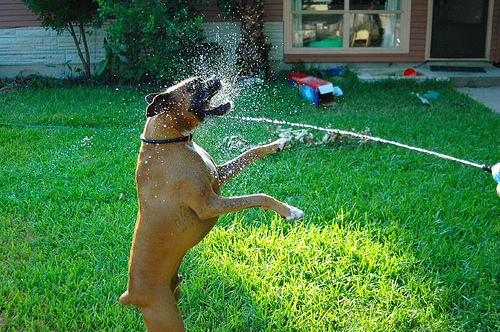

['A brown dog is sprayed with water .', 'A dog is being squirted with water in the face outdoors .', 'A dog stands on his hind feet and catches a stream of water .', 'A jug is jumping up it is being squirted with a jet of water .', 'A tan , male dog is jumping up to get a drink of water from a spraying bottle .']


In [132]:
from IPython.display import display
from PIL import Image
path="/home/suman/Desktop/Image_captioning/Flicker_dataset/Flickr8k_Dataset/Flicker8k_Dataset/44856031_0d82c2c7d1.jpg"
display(Image.open(path))
print(description['44856031_0d82c2c7d1'])

### We need to clean the text.
- Convert all words to lowercase
- Remove all words with numbers in them
- Remove all words that are one character or less in length
- Remove all punctuation
####

In [14]:

import string
def clean_descriptions(descriptions):
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            desc = desc.split()
            desc = [word.lower() for word in desc]
            desc = [w.translate(table) for w in desc]
            desc = [word for word in desc if len(word)>1]
            desc = [word for word in desc if word.isalpha()]
            # store as string
            desc_list[i] =  ' '.join(desc)
clean_descriptions(description)

In [15]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc
vocab = to_vocabulary(description)
print('Vocabulary Size: %d' % len(vocab))

Vocabulary Size: 8763


In [16]:
def save_descriptions(description, filename):
    lines = list()
    for key, desc_list in description.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()
# 
# save descriptions
save_descriptions(description, 'descriptions_inc.txt')

In [17]:
text_file = open('/home/suman/SUMAN/descriptions_inc.txt')

lines=text_file.readlines()
print (lines[1:10])

['1000268201_693b08cb0e girl going into wooden building\n', '1000268201_693b08cb0e little girl climbing into wooden playhouse\n', '1000268201_693b08cb0e little girl climbing the stairs to her playhouse\n', '1000268201_693b08cb0e little girl in pink dress going into wooden cabin\n', '1001773457_577c3a7d70 black dog and spotted dog are fighting\n', '1001773457_577c3a7d70 black dog and tricolored dog playing with each other on the road\n', '1001773457_577c3a7d70 black dog and white dog with brown spots are staring at each other in the street\n', '1001773457_577c3a7d70 two dogs of different breeds looking at each other on the road\n', '1001773457_577c3a7d70 two dogs on pavement moving toward each other\n']


In [18]:
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    for line in doc.split('\n'):
        if len(line) < 1:
            continue
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)


In [19]:
# load training dataset
filename = '/home/suman/Desktop/Image_captioning/Flicker_dataset/Flickr8k_text/Flickr_8k.trainImages.txt'
train_set = load_set(filename)
print('Dataset: %d' % len(train_set))

Dataset: 6000


In [20]:
def load_clean_descriptions(filename, dataset):
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        tokens = line.split()
        image_id, image_desc = tokens[0], tokens[1:]
        if image_id in dataset:
            if image_id not in descriptions:
                descriptions[image_id] = list()
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            descriptions[image_id].append(desc)
    return descriptions

In [21]:
train_descriptions = load_clean_descriptions('descriptions_inc.txt', train_set)
print('Descriptions: train_set = %d' % len(train_descriptions))

Descriptions: train_set = 6000


In [22]:
#Load Photo Feature
def load_photo_features(filename, dataset):
    all_features = load(open(filename, 'rb'))
    features = {k: all_features[k] for k in dataset}
    return features
train_features = load_photo_features('features_inception.pkl', train_set)
print('Photos: train_set = %d' % len(train_features))

Photos: train_set = 6000


In [23]:
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc
def max_length(descriptions):
    lines = to_lines(descriptions)
    #print(lines[0])
    return max(len(d.split()) for d in lines)
               
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Description Length: 34


In [24]:
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [25]:
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, desc_list, photo, vocab_size):
    X1, X2, y = list(), list(), list()
    for desc in desc_list:
        seq = tokenizer.texts_to_sequences([desc])[0]
        for i in range(1, len(seq)):
            in_seq, out_seq = seq[:i], seq[i]
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            X1.append(photo)
            X2.append(in_seq)
            y.append(out_seq)
    return array(X1), array(X2), array(y)

### Building the LSTM model

In [71]:
# define the captioning model
def define_model(vocab_size, max_length):
    # feature extraction model
    input1 = Input(shape=(2048,))
    f1 = Dropout(0.5)(input1)
    f2 = Dense(256, activation='relu')(f1)
    # sequence model
    input2 = Input(shape=(max_length,))
    s1 = Embedding(vocab_size, 256, mask_zero=True)(input2)
    s2 = Dropout(0.5)(s1)
    s3 = LSTM(256)(s2)
    # decoder model
    decoder1 = add([f2, s3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
  
    model = Model(inputs=[input1, input2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [72]:
from keras.preprocessing.text import Tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1

In [73]:


# data generator, intended to be used in a call to model.fit_generator()
def data_generator(descriptions, photos, tokenizer, max_length, vocab_size):
    # loop for ever over images
    while 1:
        for key, desc_list in descriptions.items():
            # retrieve the photo feature
            photo = photos[key][0]
            in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo, vocab_size)
            yield [[in_img, in_seq], out_word]



In [74]:
# test the data generator
generator = data_generator(train_descriptions, train_features, tokenizer, max_length, vocab_size)
inputs, outputs = next(generator)

print(inputs[0].shape)
print(inputs[1].shape)
print(outputs.shape)

(47, 2048)
(47, 34)
(47, 7579)



### Training the LSTM model

In [75]:
model = define_model(vocab_size, max_length)
epochs = 10
steps = len(train_descriptions)
for i in range(epochs):
    # create the data generator
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length, vocab_size)
    # fit for one epoch
    history =model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    # save model
    model.save('model_' + str(i) + '.h5')

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 34)           0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 34, 256)      1940224     input_13[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 2048)         0           input_12[0][0]                   
____________________________________________________________________________________________

In [76]:
dump(tokenizer, open('tokenizer_inc.pkl', 'wb'))

### Generate New Captions for New images

In [77]:
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

In [78]:
# extract features from each photo in the directory
from numpy import argmax
def extract_features(filename):
    # load the model
    model = InceptionV3()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # load the photo
    image = load_img(filename, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature



In [79]:
from keras.models import load_model
model = load_model('/home/suman/SUMAN/model_9.h5')
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 34)           0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 34, 256)      1940224     input_13[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 2048)         0           input_12[0][0]                   
____________________________________________________________________________________________

In [80]:
from IPython.display import display
from PIL import Image
# path="/home/suman/SUMAN/model.png"
# display(Image.open(path))

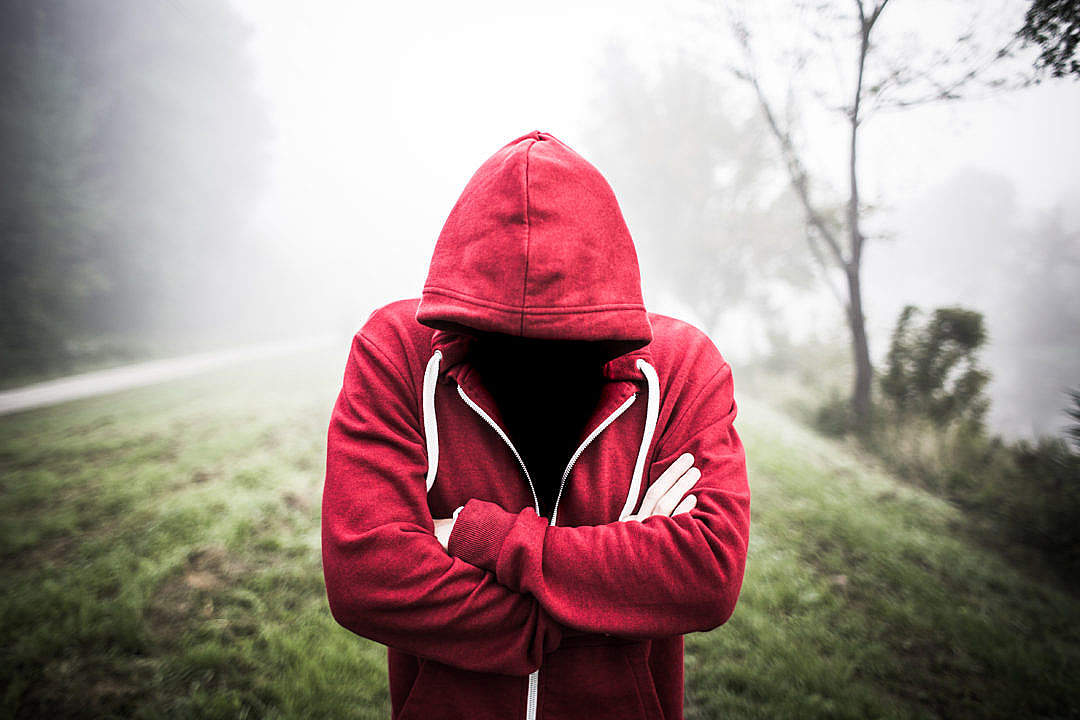

startseq two girls are playing in the grass endseq


In [81]:

path="/home/suman/SUMAN/Images/example.jpg"
display(Image.open(path))


photo = extract_features('/home/suman/SUMAN/Images/example.jpg')
description = generate_desc(model, tokenizer, photo, max_length)
print(description)


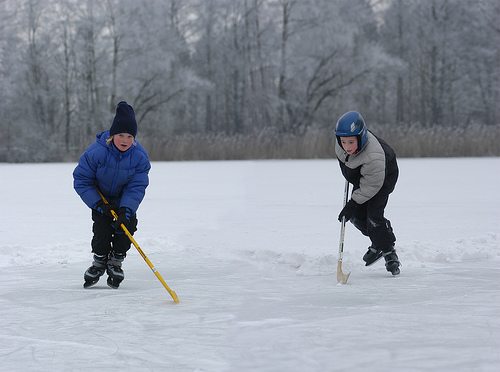

startseq man is walking on the beach endseq


In [82]:

path="/home/suman/SUMAN/Images/3.jpg"
display(Image.open(path))


photo = extract_features('/home/suman/SUMAN/Images/3.jpg')
description = generate_desc(model, tokenizer, photo, max_length)
print(description)



startseq man is climbing up rock face endseq


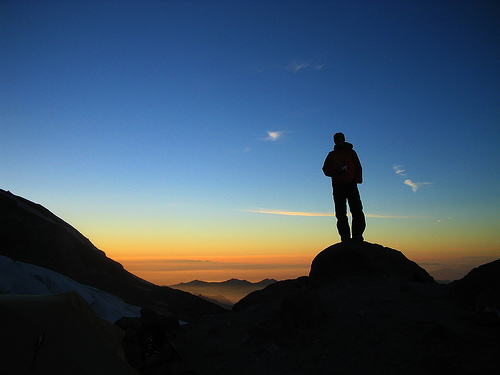

In [84]:

photo = extract_features('/home/suman/SUMAN/Images/2.jpg')
d4 = generate_desc(model, tokenizer, photo, max_length)
print(d4)
path="/home/suman/SUMAN/Images/2.jpg"
display(Image.open(path))

### Cumulative N-Gram BLEU Scores

BLEU, or the Bilingual Evaluation Understudy, is a score for comparing a candidate translation of text to one or more reference translations.A perfect match results in a score of 1.0, whereas a perfect mismatch results in a score of 0.0.

In [85]:
from nltk.translate.bleu_score import corpus_bleu
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    actual, predicted = list(), list()
    # step over the whole set
    for key, desc_list in descriptions.items():
        # generate description
        yhat = generate_desc(model, tokenizer, photos[key], max_length)
        # store actual and predicted
        references = [d.split() for d in desc_list]
        actual.append(references)
        predicted.append(yhat.split())
    # calculate BLEU score
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

filename = '/home/suman/Desktop/Image_captioning/Flicker_dataset/Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions_inc.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features_inception.pkl', test)
print('Photos: test=%d' % len(test_features))
    
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)


Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.560461
BLEU-2: 0.304736
BLEU-3: 0.198677
BLEU-4: 0.086893
